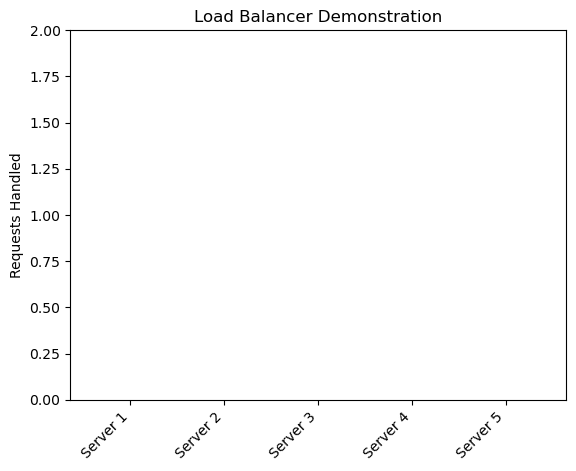

Hello from Server 5, handled 1 requests
Hello from Server 4, handled 1 requests
Hello from Server 5, handled 2 requests
Hello from Server 4, handled 2 requests
Hello from Server 2, handled 1 requests
Hello from Server 1, handled 1 requests
Hello from Server 4, handled 3 requests
Hello from Server 4, handled 4 requests
Hello from Server 1, handled 2 requests
Hello from Server 5, handled 3 requests
Hello from Server 4, handled 5 requests
Hello from Server 2, handled 2 requests
Hello from Server 5, handled 4 requests
Hello from Server 4, handled 6 requests
Hello from Server 3, handled 1 requests
Hello from Server 1, handled 3 requests
Hello from Server 3, handled 2 requests
Hello from Server 2, handled 3 requests
Hello from Server 1, handled 4 requests
Hello from Server 2, handled 4 requests
Hello from Server 4, handled 7 requests
Hello from Server 4, handled 8 requests
Hello from Server 4, handled 9 requests
Hello from Server 3, handled 3 requests
Hello from Server 1, handled 5 requests


In [8]:
import serial  
import matplotlib.pyplot as plt
import numpy as np
import threading
import time

# HRNG Class for Reading Random Values
class HRNG:
    def __init__(self, port="COM7", baudrate=9600):
        self.ser = serial.Serial(port, baudrate, timeout=1)

    def get_random_number(self):
        while True:
            bs = self.ser.readline().decode("utf-8").strip()
            try:
                value = float(bs)
                return int(value * 20)  # Scale 0-5V to 0-100 range
            except ValueError:
                continue  # Ignore invalid data

    def close(self):
        self.ser.close()


# Server Class
class Server:
    def __init__(self, name):
        self.name = name
        self.request_count = 0

    def handle_request(self):
        self.request_count += 1
        return f"Hello from {self.name}, handled {self.request_count} requests"


# Initialize Servers and HRNG
servers = [Server(f"Server {i+1}") for i in range(5)]
hrng_device = HRNG()

# Load Balancer Function
def load_balancer(hrng_value):
    selected_server = servers[hrng_value % len(servers)]
    response = selected_server.handle_request()
    print(response)  # Print the load balancing info
    return response


# Terminal-Based Load Balancer Test
def test_load_balancer(request_count):
    responses = []
    for _ in range(request_count):
        random_number = hrng_device.get_random_number()
        response = load_balancer(random_number)
        responses.append(response)
        time.sleep(0.1)  # Simulate delay
    print("\nFinal Load Balancing Statistics:")
    for server in servers:
        print(f"{server.name}: {server.request_count} requests handled")
    return responses


# Visualization Setup
fig, ax = plt.subplots()
server_names = [server.name for server in servers]
request_counts = [0] * len(servers)
bars = ax.bar(server_names, request_counts, color='blue')

ax.set_ylim(0, 10)  # Set max height for visualization
ax.set_ylabel("Requests Handled")
ax.set_title("Load Balancer Demonstration")
plt.xticks(rotation=45, ha="right")


# Function to Update Animation
def update_plot():
    while plt.fignum_exists(fig.number):
        request_counts = [server.request_count for server in servers]
        for bar, count in zip(bars, request_counts):
            bar.set_height(count)
        ax.set_ylim(0, max(request_counts) + 2)
        plt.pause(0.5)


# Start Animation in a Separate Thread
thread = threading.Thread(target=update_plot, daemon=True)
thread.start()

# Run Load Balancer Simulation
test_load_balancer(50)

# Show Plot
plt.show()

hrng_device.close()


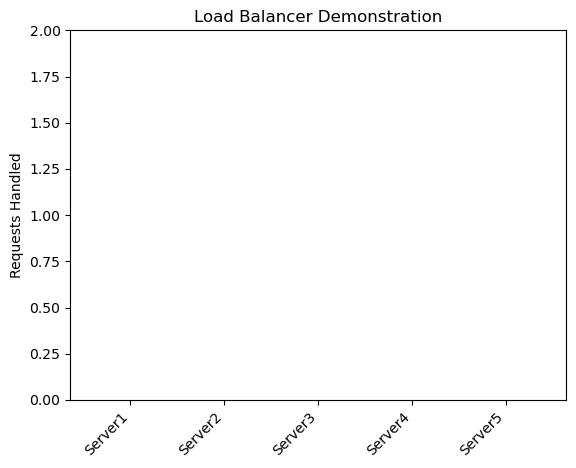

Raw: 4.55, Mapped: 90
Hello from Server1, handled 1 requests
Raw: 4.57, Mapped: 91
Hello from Server2, handled 1 requests
Raw: 4.64, Mapped: 92
Hello from Server3, handled 1 requests
Raw: 4.59, Mapped: 91
Hello from Server2, handled 2 requests
Raw: 4.76, Mapped: 95
Hello from Server1, handled 2 requests
Raw: 4.76, Mapped: 95
Hello from Server1, handled 3 requests
Raw: 4.77, Mapped: 95
Hello from Server1, handled 4 requests
Raw: 4.72, Mapped: 94
Hello from Server5, handled 1 requests
Raw: 5.06, Mapped: 101
Hello from Server2, handled 3 requests
Raw: 1.74, Mapped: 34
Hello from Server5, handled 2 requests

Final Load Balancing Statistics:
Server1: 4 requests handled
Server2: 3 requests handled
Server3: 1 requests handled
Server4: 0 requests handled
Server5: 2 requests handled


In [10]:
import serial  
import matplotlib.pyplot as plt
import numpy as np
import threading
import time

def hrng():
    ser = serial.Serial("COM7", 9600)
    try:
        while True:
            bs = ser.readline().decode("utf-8").strip()
            try:
                value = float(bs)
                mapped_value = int((value / 5.0) * 100)
                print(f"Raw: {value}, Mapped: {mapped_value}")
                return mapped_value
            except ValueError:
                continue
    finally:
        ser.close()

class Server:
    def __init__(self, name):
        self.name = name
        self.request_count = 0

    def handle_request(self):
        self.request_count += 1
        return f"Hello from {self.name}, handled {self.request_count} requests"

servers = [Server(f"Server{i + 1}") for i in range(5)]

def load_balancer(hrng_value):
    selected_server = servers[hrng_value % len(servers)]
    return selected_server.handle_request()

def test_load_balancer(request_count):
    responses = []
    for _ in range(request_count):
        random_number = hrng()
        response = load_balancer(random_number)
        responses.append(response)
        print(response)
        time.sleep(0.5)
    print("\nFinal Load Balancing Statistics:")
    for server in servers:
        print(f"{server.name}: {server.request_count} requests handled")
    return responses

# Visualization Setup
fig, ax = plt.subplots()
server_names = [server.name for server in servers]
request_counts = [0] * len(servers)
bars = ax.bar(server_names, request_counts, color='blue')
ax.set_ylim(0, 10)
ax.set_ylabel("Requests Handled")
ax.set_title("Load Balancer Demonstration")
plt.xticks(rotation=45, ha="right")

def update_plot():
    while plt.fignum_exists(fig.number):
        request_counts = [server.request_count for server in servers]
        for bar, count in zip(bars, request_counts):
            bar.set_height(count)
        ax.set_ylim(0, max(request_counts) + 2)
        plt.pause(0.5)

thread = threading.Thread(target=update_plot, daemon=True)
thread.start()
test_load_balancer(10)
plt.show()

In [12]:
import serial  

def hrng():
    ser = serial.Serial("COM7", 9600) 
    try:
        while True:
            bs = ser.readline().decode("utf-8").strip()  
            try:
                value = float(bs) 
                mapped_value = int((value / 5.0) * 100)
                print(f"Raw: {value}, Mapped: {mapped_value}")
                return mapped_value 
            except ValueError:
                continue 
    finally:
        ser.close()  

class Server:
    def __init__(self, name):
        self.name = name
        self.request_count = 0

    def handle_request(self):
        self.request_count += 1
        return f"Hello from {self.name}, handled {self.request_count} requests"

servers = [Server(f"Server{i + 1}") for i in range(5)]

def load_balancer(hrng_value):
    selected_server = servers[hrng_value % len(servers)] 
    return selected_server.handle_request()

def test_load_balancer(request_count):
    responses = []
    for _ in range(request_count):
        random_number = hrng()  
        response = load_balancer(random_number)  
        responses.append(response)
        print(response)  
    print("\nFinal Load Balancing Statistics:")
    for server in servers:
        print(f"{server.name}: {server.request_count} requests handled")
    return responses

test_load_balancer(10) 

Raw: 3.61, Mapped: 72
Hello from Server3, handled 1 requests
Raw: 3.54, Mapped: 70
Hello from Server1, handled 1 requests
Raw: 3.56, Mapped: 71
Hello from Server2, handled 1 requests
Raw: 3.46, Mapped: 69
Hello from Server5, handled 1 requests
Raw: 3.47, Mapped: 69
Hello from Server5, handled 2 requests
Raw: 3.45, Mapped: 69
Hello from Server5, handled 3 requests
Raw: 3.5, Mapped: 70
Hello from Server1, handled 2 requests
Raw: 3.58, Mapped: 71
Hello from Server2, handled 2 requests
Raw: 3.4, Mapped: 68
Hello from Server4, handled 1 requests
Raw: 3.46, Mapped: 69
Hello from Server5, handled 4 requests

Final Load Balancing Statistics:
Server1: 2 requests handled
Server2: 2 requests handled
Server3: 1 requests handled
Server4: 1 requests handled
Server5: 4 requests handled


['Hello from Server3, handled 1 requests',
 'Hello from Server1, handled 1 requests',
 'Hello from Server2, handled 1 requests',
 'Hello from Server5, handled 1 requests',
 'Hello from Server5, handled 2 requests',
 'Hello from Server5, handled 3 requests',
 'Hello from Server1, handled 2 requests',
 'Hello from Server2, handled 2 requests',
 'Hello from Server4, handled 1 requests',
 'Hello from Server5, handled 4 requests']

Raw: 3.41, Mapped: 68
Hello from Server4, handled 1 requests
Raw: 3.39, Mapped: 67
Hello from Server3, handled 1 requests
Raw: 3.33, Mapped: 66
Hello from Server2, handled 1 requests
Raw: 3.25, Mapped: 65
Hello from Server1, handled 1 requests
Raw: 3.22, Mapped: 64
Hello from Server5, handled 1 requests
Raw: 3.32, Mapped: 66
Hello from Server2, handled 2 requests
Raw: 3.32, Mapped: 66
Hello from Server2, handled 3 requests
Raw: 3.23, Mapped: 64
Hello from Server5, handled 2 requests
Raw: 3.22, Mapped: 64
Hello from Server5, handled 3 requests
Raw: 3.28, Mapped: 65
Hello from Server1, handled 2 requests

Final Load Balancing Statistics:
Server1: 2 requests handled
Server2: 3 requests handled
Server3: 1 requests handled
Server4: 1 requests handled
Server5: 3 requests handled


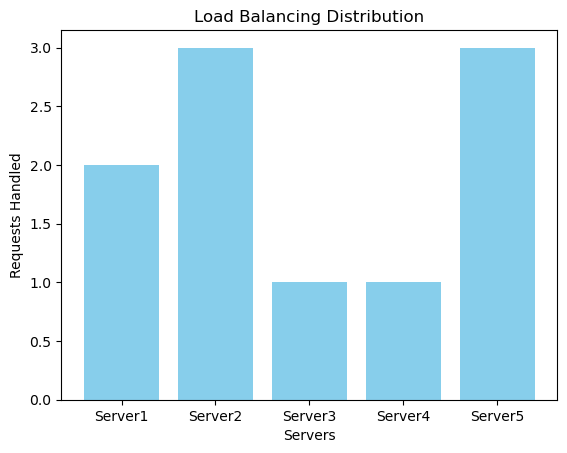

['Hello from Server4, handled 1 requests',
 'Hello from Server3, handled 1 requests',
 'Hello from Server2, handled 1 requests',
 'Hello from Server1, handled 1 requests',
 'Hello from Server5, handled 1 requests',
 'Hello from Server2, handled 2 requests',
 'Hello from Server2, handled 3 requests',
 'Hello from Server5, handled 2 requests',
 'Hello from Server5, handled 3 requests',
 'Hello from Server1, handled 2 requests']

In [13]:
import serial
import matplotlib.pyplot as plt

# Function to read and map HRNG value
def hrng():
    ser = serial.Serial("COM7", 9600)
    try:
        while True:
            bs = ser.readline().decode("utf-8").strip()
            try:
                value = float(bs)
                mapped_value = int((value / 5.0) * 100)
                print(f"Raw: {value}, Mapped: {mapped_value}")
                return mapped_value
            except ValueError:
                continue
    finally:
        ser.close()

# Server class
class Server:
    def __init__(self, name):
        self.name = name
        self.request_count = 0

    def handle_request(self):
        self.request_count += 1
        return f"Hello from {self.name}, handled {self.request_count} requests"

# Create servers
servers = [Server(f"Server{i + 1}") for i in range(5)]

# Load balancing function
def load_balancer(hrng_value):
    selected_server = servers[hrng_value % len(servers)]
    return selected_server.handle_request()

# Test function with histogram
def test_load_balancer(request_count):
    responses = []
    server_loads = {server.name: 0 for server in servers}
    
    for _ in range(request_count):
        random_number = hrng()
        response = load_balancer(random_number)
        responses.append(response)
        print(response)
        
        # Update server load count
        selected_server_name = response.split(",")[0].split(" ")[-1]
        server_loads[selected_server_name] += 1
    
    print("\nFinal Load Balancing Statistics:")
    for server in servers:
        print(f"{server.name}: {server.request_count} requests handled")
    
    # Generate histogram
    plt.bar(server_loads.keys(), server_loads.values(), color='skyblue')
    plt.xlabel("Servers")
    plt.ylabel("Requests Handled")
    plt.title("Load Balancing Distribution")
    plt.show()
    
    return responses

test_load_balancer(10)

Raw: 5.52, Mapped: 110
Hello from Server3, handled 1 requests
Raw: 5.48, Mapped: 109
Hello from Server2, handled 1 requests
Raw: 5.53, Mapped: 110
Hello from Server3, handled 2 requests
Raw: 5.48, Mapped: 109
Hello from Server2, handled 2 requests
Raw: 5.51, Mapped: 110
Hello from Server3, handled 3 requests
Raw: 5.5, Mapped: 110
Hello from Server3, handled 4 requests
Raw: 5.5, Mapped: 110
Hello from Server3, handled 5 requests
Raw: 5.45, Mapped: 109
Hello from Server2, handled 3 requests
Raw: 5.4, Mapped: 108
Hello from Server1, handled 1 requests
Raw: 5.38, Mapped: 107
Hello from Server3, handled 6 requests
Raw: 5.39, Mapped: 107
Hello from Server3, handled 7 requests
Raw: 5.41, Mapped: 108
Hello from Server1, handled 2 requests
Raw: 5.44, Mapped: 108
Hello from Server1, handled 3 requests
Raw: 5.35, Mapped: 106
Hello from Server2, handled 4 requests
Raw: 5.37, Mapped: 107
Hello from Server3, handled 8 requests
Raw: 5.42, Mapped: 108
Hello from Server1, handled 4 requests
Raw: 5.34, 

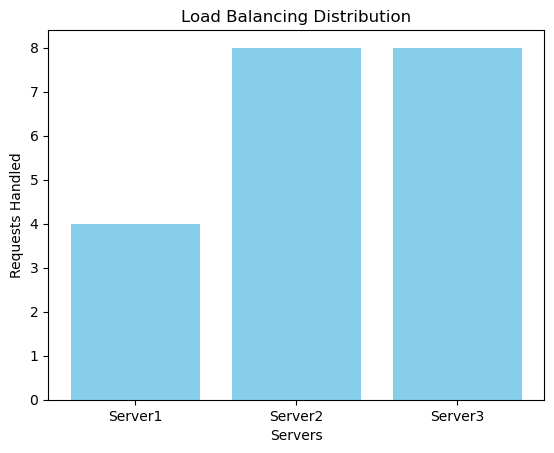

['Hello from Server3, handled 1 requests',
 'Hello from Server2, handled 1 requests',
 'Hello from Server3, handled 2 requests',
 'Hello from Server2, handled 2 requests',
 'Hello from Server3, handled 3 requests',
 'Hello from Server3, handled 4 requests',
 'Hello from Server3, handled 5 requests',
 'Hello from Server2, handled 3 requests',
 'Hello from Server1, handled 1 requests',
 'Hello from Server3, handled 6 requests',
 'Hello from Server3, handled 7 requests',
 'Hello from Server1, handled 2 requests',
 'Hello from Server1, handled 3 requests',
 'Hello from Server2, handled 4 requests',
 'Hello from Server3, handled 8 requests',
 'Hello from Server1, handled 4 requests',
 'Hello from Server2, handled 5 requests',
 'Hello from Server2, handled 6 requests',
 'Hello from Server2, handled 7 requests',
 'Hello from Server2, handled 8 requests']

In [4]:
import serial
import matplotlib.pyplot as plt

def hrng():
    ser = serial.Serial("COM7", 9600)
    try:
        while True:
            bs = ser.readline().decode("utf-8").strip()
            try:
                value = float(bs)
                mapped_value = int((value / 5.0) * 100)
                print(f"Raw: {value}, Mapped: {mapped_value}")
                return mapped_value
            except ValueError:
                continue
    finally:
        ser.close()

class Server:
    def __init__(self, name):
        self.name = name
        self.request_count = 0

    def handle_request(self):
        self.request_count += 1
        return f"Hello from {self.name}, handled {self.request_count} requests"

servers = [Server(f"Server{i + 1}") for i in range(3)]

def load_balancer(hrng_value):
    selected_server = servers[hrng_value % len(servers)]
    return selected_server.handle_request()

def test_load_balancer(request_count):
    responses = []
    server_loads = {server.name: 0 for server in servers}
    
    for _ in range(request_count):
        random_number = hrng()
        response = load_balancer(random_number)
        responses.append(response)
        print(response)
        
        selected_server_name = response.split(",")[0].split(" ")[-1]
        server_loads[selected_server_name] += 1
    
    print("\nFinal Load Balancing Statistics:")
    for server in servers:
        print(f"{server.name}: {server.request_count} requests handled")
    
    plt.bar(server_loads.keys(), server_loads.values(), color='skyblue')
    plt.xlabel("Servers")
    plt.ylabel("Requests Handled")
    plt.title("Load Balancing Distribution")
    plt.show()
    
    return responses

test_load_balancer(20)
